In [85]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('data/pima-indians-diabetes.csv',header=None, names=["pregnant","plasma",'pressure','thickness','insulin','BMI','pedigree','age','class'])

df.head(3)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [86]:
df.shape

(768, 9)

In [87]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [90]:
df[['pregnant','class']].head(3)

,pregnant,class
0,6,1
1,1,0
2,8,1


In [91]:
df_data = df[['pregnant','class']]

#pregnant 기준으로 groupby 
df_group = df_data.groupby(['pregnant'],as_index =False)
#평균을 낸 뒤 pregnant 기준으로 내림차순 정렬
df_group.mean().sort_values(by='pregnant', ascending=False)

,pregnant,class
16,17,1.000000
15,15,1.000000
14,14,1.000000
13,13,0.500000
12,12,0.444444
11,11,0.636364
10,10,0.416667
9,9,0.642857
8,8,0.578947
7,7,0.555556


<AxesSubplot:>

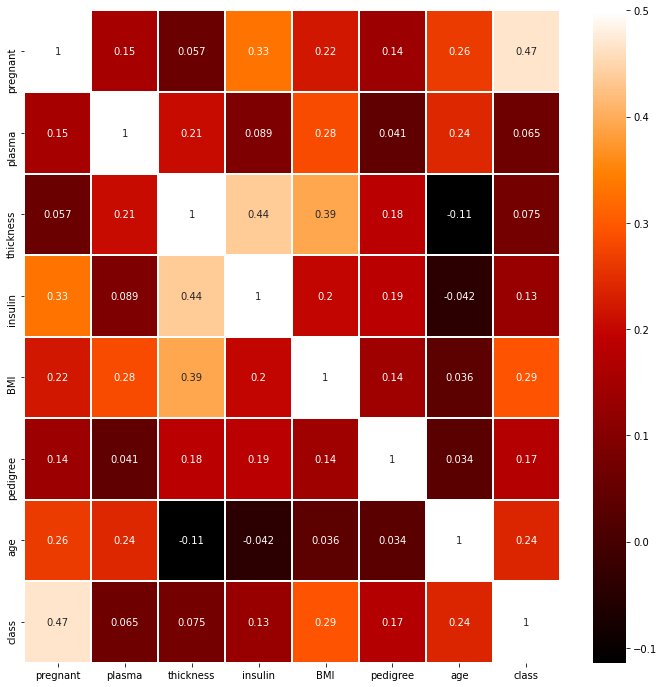

In [41]:
#데이터 간의 상관관계를 그래프로 표현
colormap = plt.cm.gist_heat #그래프 색상 구성을 정함
plt.figure(figsize=(12,12)) #그래프의 크기를 정함

#그래프의 속성을 결정. vmax 의 값을 0.5로 지정해 0.5 에 가까울수록 밝은 색으로 표시되도록
sns.heatmap(df.corr(),linewidths=0.1, vmax=0.5, cmap = colormap, linecolor='white', annot =True)

https://matplotlib.org/2.0.2/users/colormaps.html  
에서 색상 설정 가능함

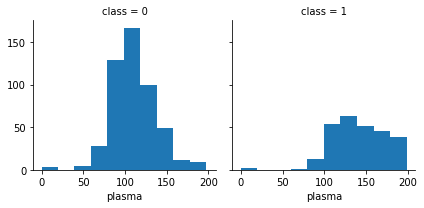

In [92]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist,'plasma',bins = 10)
plt.show()

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import tensorflow as tf 

np.random.seed(3)
tf.random.set_seed(3)

dataset = np.loadtxt('data/pima-indians-diabetes.csv',delimiter=",")
x = dataset[:,0:8]
y = dataset[:,8]

In [94]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size = 0.3)

print(train.shape)
print(test.shape)

(537, 9)
(231, 9)


In [95]:
model = Sequential()
model.add(Dense(12,input_dim=8,activation ='relu'))
model.add(Dense(8,activation ='relu'))
model.add(Dense(1,activation ='sigmoid'))

In [96]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
model.fit(x,y,epochs = 200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 1s 546us/step - loss: 12.0693 - accuracy: 0.6273
Epoch 2/200
77/77 [==============================] - 0s 486us/step - loss: 5.7426 - accuracy: 0.6227
Epoch 3/200
77/77 [==============================] - 0s 493us/step - loss: 3.2875 - accuracy: 0.5365
Epoch 4/200
77/77 [==============================] - 0s 498us/step - loss: 1.6549 - accuracy: 0.5589
Epoch 5/200
77/77 [==============================] - 0s 491us/step - loss: 0.8960 - accuracy: 0.4802
Epoch 6/200
77/77 [==============================] - 0s 499us/step - loss: 0.8696 - accuracy: 0.5314
Epoch 7/200
77/77 [==============================] - 0s 470us/step - loss: 0.7652 - accuracy: 0.6588
Epoch 8/200
77/77 [==============================] - 0s 499us/step - loss: 0.7709 - accuracy: 0.6785
Epoch 9/200
77/77 [==============================] - 0s 472us/step - loss: 0.7154 - accuracy: 0.6615
Epoch 10/200
77/77 [==============================] - 0s 499us/step - loss: 0.6585 - accur

77/77 [==============================] - 0s 459us/step - loss: 0.4813 - accuracy: 0.7676
Epoch 161/200
77/77 [==============================] - 0s 472us/step - loss: 0.4799 - accuracy: 0.7651
Epoch 162/200
77/77 [==============================] - 0s 472us/step - loss: 0.4514 - accuracy: 0.7772
Epoch 163/200
77/77 [==============================] - 0s 486us/step - loss: 0.4969 - accuracy: 0.7515
Epoch 164/200
77/77 [==============================] - 0s 480us/step - loss: 0.4960 - accuracy: 0.7705
Epoch 165/200
77/77 [==============================] - 0s 446us/step - loss: 0.4818 - accuracy: 0.7513
Epoch 166/200
77/77 [==============================] - 0s 472us/step - loss: 0.4581 - accuracy: 0.7711
Epoch 167/200
77/77 [==============================] - 0s 459us/step - loss: 0.4641 - accuracy: 0.7733
Epoch 168/200
77/77 [==============================] - 0s 472us/step - loss: 0.4702 - accuracy: 0.7689
Epoch 169/200
77/77 [==============================] - 0s 451us/step - loss: 0.4654 - a

In [63]:
print("\n Accuracy : %.4f" %(model.evaluate(x,y)[1]))

24/24 [==============================] - 0s 477us/step - loss: 0.4592 - accuracy: 0.7721

 Accuracy : 0.7721


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf
numpy.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv("data/pima-indians-diabetes.csv",  names = ['pregnant','plasma','pressure','thickness','insulin','bmi','pedigree','age','class'])

train, test = train_test_split(df,test_size = 0.2)

train_arr = train.to_numpy()
test_arr = test.to_numpy()

X = dataset[:, 0:8]
Y = dataset[:,8]


x_train = train_arr[:,0:8]
y_train = train_arr[:,8]
x_test = test_arr[:,0:8]
y_test = test_arr[:,8]


model = Sequential()
model.add(Dense(100, input_dim=8, activation = 'relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=100, batch_size=512)
print("\n 정확도 : %.4f"%(model.evaluate(x_test, y_test)[1]))

Epoch 1/100
2/2 [==============================] - 0s 997us/step - loss: 2.5447 - accuracy: 0.6526
Epoch 2/100
2/2 [==============================] - 0s 998us/step - loss: 1.0988 - accuracy: 0.6620
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 1.2570 - accuracy: 0.6205
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 1.0179 - accuracy: 0.6272
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.6470
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8198 - accuracy: 0.6759
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7398 - accuracy: 0.7006
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.6646
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6594
Epoch 10/100
2/2 [==============================] - 0s 998us/step - loss: 0.6579 - accuracy: 0.6733
Epoch 11/100
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7219
Epoch 85/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5233 - accuracy: 0.7317
Epoch 86/100
2/2 [==============================] - 0s 998us/step - loss: 0.5016 - accuracy: 0.7429
Epoch 87/100
2/2 [==============================] - 0s 997us/step - loss: 0.5340 - accuracy: 0.7349
Epoch 88/100
2/2 [==============================] - 0s 997us/step - loss: 0.5587 - accuracy: 0.6830
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7631
Epoch 90/100
2/2 [==============================] - 0s 997us/step - loss: 0.5482 - accuracy: 0.7308
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.7143
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7397
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7510
Epoch 94/100
2/2 [=======

In [98]:
model.predict(x_test)

array([[1.65602386e-01],
       [7.63575494e-01],
       [4.54249680e-02],
       [9.36280072e-01],
       [6.32738709e-01],
       [3.90490860e-01],
       [1.39691055e-01],
       [7.24494457e-03],
       [3.48862112e-02],
       [3.15132737e-02],
       [8.35925102e-01],
       [4.07709181e-02],
       [8.66287947e-02],
       [7.45624661e-01],
       [4.80347455e-01],
       [5.80891669e-02],
       [4.13084924e-01],
       [7.39283264e-02],
       [3.89967322e-01],
       [4.56202716e-01],
       [1.84301347e-01],
       [9.62370038e-02],
       [1.10220104e-01],
       [5.19499779e-01],
       [9.70154107e-02],
       [6.78956330e-01],
       [2.28353322e-01],
       [2.56398678e-01],
       [4.43310738e-01],
       [3.03276062e-01],
       [7.27666259e-01],
       [3.56741548e-02],
       [3.25763345e-01],
       [6.00570440e-03],
       [2.50886053e-01],
       [2.05820918e-01],
       [1.33119315e-01],
       [1.76500946e-01],
       [4.19753730e-01],
       [7.22737074e-01],
